In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings(action = 'ignore')

C:\Users\jijin\AppData\Local\Temp\ipykernel_25520\2819909948.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
data = pd.read_csv('banking.csv', header = 0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
data.shape

(41188, 21)

In [5]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [6]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [7]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

<AxesSubplot: >

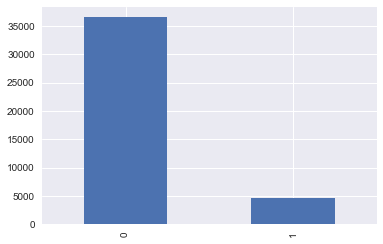

In [8]:
data['y'].value_counts().plot(kind="bar")

In [9]:
data.nunique()

age                 78
job                 12
marital              4
education            6
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64

In [10]:
y=data['y']
data.drop('y',axis = 1, inplace = True)

In [11]:
cat_vars=data.select_dtypes(include='object')
cat_ohe = pd.get_dummies(cat_vars,drop_first = True)

In [12]:
int_col = data.select_dtypes(exclude = 'object')
int_col=(int_col-int_col.min())/(int_col.max()-int_col.min())
int_col

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.333333,0.042700,0.000000,1.000000,0.000000,1.000000,0.484412,0.615063,0.981410,1.000000
1,0.444444,0.028060,0.000000,1.000000,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883
2,0.135802,0.068930,0.036364,0.006006,0.285714,0.354167,0.722525,0.460251,0.021537,0.105860
3,0.271605,0.037617,0.018182,1.000000,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287
4,0.469136,0.027857,0.000000,0.003003,0.142857,0.104167,0.000000,0.811715,0.053276,0.425709
...,...,...,...,...,...,...,...,...,...,...
41183,0.518519,0.045140,0.000000,1.000000,0.000000,1.000000,0.882307,0.376569,0.959420,1.000000
41184,0.172840,0.039854,0.018182,1.000000,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735
41185,0.308642,0.012607,0.036364,1.000000,0.000000,0.937500,0.698753,0.602510,0.957379,0.859735
41186,0.382716,0.040667,0.018182,1.000000,0.000000,0.000000,0.089634,1.000000,0.024484,0.203781


In [13]:
X = pd.concat([cat_ohe,int_col],axis = 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [16]:
y_pred = log.fit(X_train,y_train).predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred , y_test)

0.9146637533381888

Since the target variable is imbalanced we will get good accuracy score Soo we should balance the dataset,

To balance the dataset we can either use OverSampling or Undersampling Technique

# Oversampling
In this dataset I had used BorderlineSmote for OverSampling

In [18]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train, y_train)

In [19]:
log_model_bsmote = log.fit(X_resampled, y_resampled)

In [20]:
y_log = log_model_bsmote.predict(X_test)

In [21]:
y_pred_over = log.fit(X_resampled, y_resampled).predict(X_test)

In [22]:
accuracy_score(y_pred_over , y_test)

0.8733915999028891

# UnderSampling
Most of the time we should avoid using UnderSampling because it removes the observations to balance the dataset

In [23]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler().fit_resample(X_train, y_train)

In [24]:
y_pred_under = log.fit(X_resampled, y_resampled).predict(X_test)

In [25]:
accuracy_score(y_pred_under, y_test)

0.8619810633648944

In [26]:
# !pip install mlflow

In [27]:
# def mlflow_logger(experiment_name, run_metrics, model):
    
#     import mlflow
    
#     mlflow.set_experiment(experiment_name)
        
#     with mlflow.start_run():
        
#         for metric in run_metrics:
#             mlflow.log_metric(metric, run_metrics[metric])
            
#         mlflow.sklearn.log_model(model, 'model1')
            
#         mlflow.set_tag('tag1', 'LogisticRegression')
        
#     print(f'Run {experiment_name} is logged to experiment - {experiment_name}')

In [28]:
# def get_metric(y_true, y_pred):
#     from sklearn.metrics import accuracy_score, precision_score, recall_score
#     acc = accuracy_score(y_true, y_pred)
#     prec = precision_score(y_true, y_pred)
#     recall = recall_score(y_true, y_pred)
#     return {'Accuracy': acc, 'Precision': prec, 'Recall': recall}

In [29]:
# metrics1 = get_metric(y_pred_over, y_pred)

In [30]:
# mlflow_logger('Jinjin', metrics1, log_model_bsmote)